<a href="https://colab.research.google.com/github/Satyajit1512/DeepLearningWithPython/blob/main/DLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Linear classifier test example

number_of_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size = number_of_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1,0.5], [0.5,1]],
    size = number_of_samples_per_class
)

In [ ]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
np.ones((num_samples_per_class, 1), dtype="float32")))

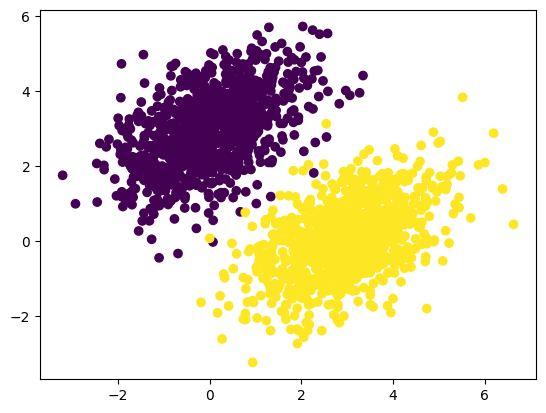

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):

  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.0374
Loss at step 1: 0.6879
Loss at step 2: 0.2150
Loss at step 3: 0.1524
Loss at step 4: 0.1363
Loss at step 5: 0.1261
Loss at step 6: 0.1174
Loss at step 7: 0.1094
Loss at step 8: 0.1022
Loss at step 9: 0.0955
Loss at step 10: 0.0895
Loss at step 11: 0.0839
Loss at step 12: 0.0789
Loss at step 13: 0.0743
Loss at step 14: 0.0701
Loss at step 15: 0.0662
Loss at step 16: 0.0627
Loss at step 17: 0.0595
Loss at step 18: 0.0565
Loss at step 19: 0.0539
Loss at step 20: 0.0514
Loss at step 21: 0.0492
Loss at step 22: 0.0471
Loss at step 23: 0.0453
Loss at step 24: 0.0436
Loss at step 25: 0.0420
Loss at step 26: 0.0406
Loss at step 27: 0.0393
Loss at step 28: 0.0381
Loss at step 29: 0.0370
Loss at step 30: 0.0360
Loss at step 31: 0.0351
Loss at step 32: 0.0343
Loss at step 33: 0.0336
Loss at step 34: 0.0329
Loss at step 35: 0.0322
Loss at step 36: 0.0317
Loss at step 37: 0.0311
Loss at step 38: 0.0307
Loss at step 39: 0.0302


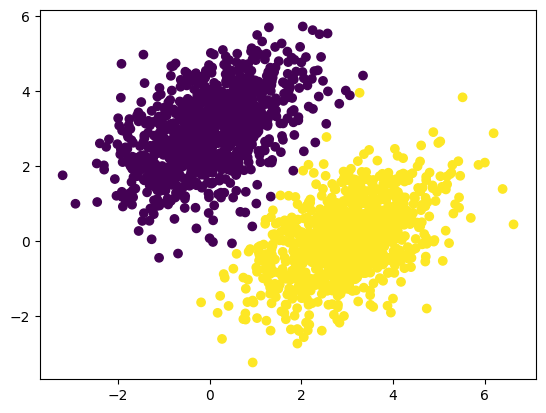

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

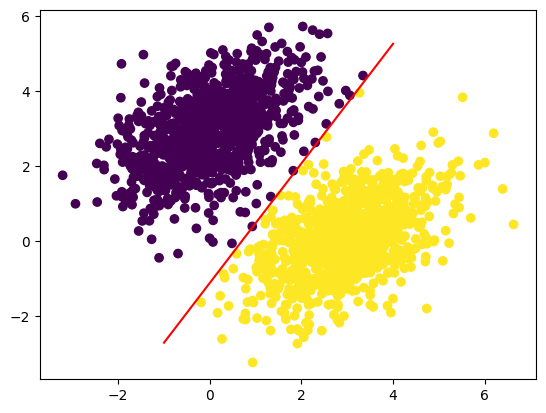

In [ ]:

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)